[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib notebook

import imars3d
print(f"Using imarsd version {imars3d.__version__}")

from __code.imars3dui import Imars3dui
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

%matplotlib notebook

Using imarsd version 1.1.4


** Using Debugging Mode! **


# Select input data 

## raw data

In [2]:
o_imars3dui = Imars3dui(working_dir=system.System.get_working_dir())

# o_imars3dui.select_raw()
o_imars3dui.current_data_type = DataType.raw
o_imars3dui.data_selected(['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ct_scans/Feb04_2020'])

raw folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ct_scans/Feb04_2020'] with 1165 files)


## ob 

In [3]:
o_imars3dui.select_ob()

ob folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ob/Feb04_2020'] with 10 files)


## dc 

In [4]:
o_imars3dui.select_dc()

dc folder selected: ['/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/dc/Feb06_2020'] with 10 files)


# Load

ct:   0%|          | 0/1165 [00:00<?, ?it/s]

ob:   0%|          | 0/10 [00:00<?, ?it/s]

dc:   0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


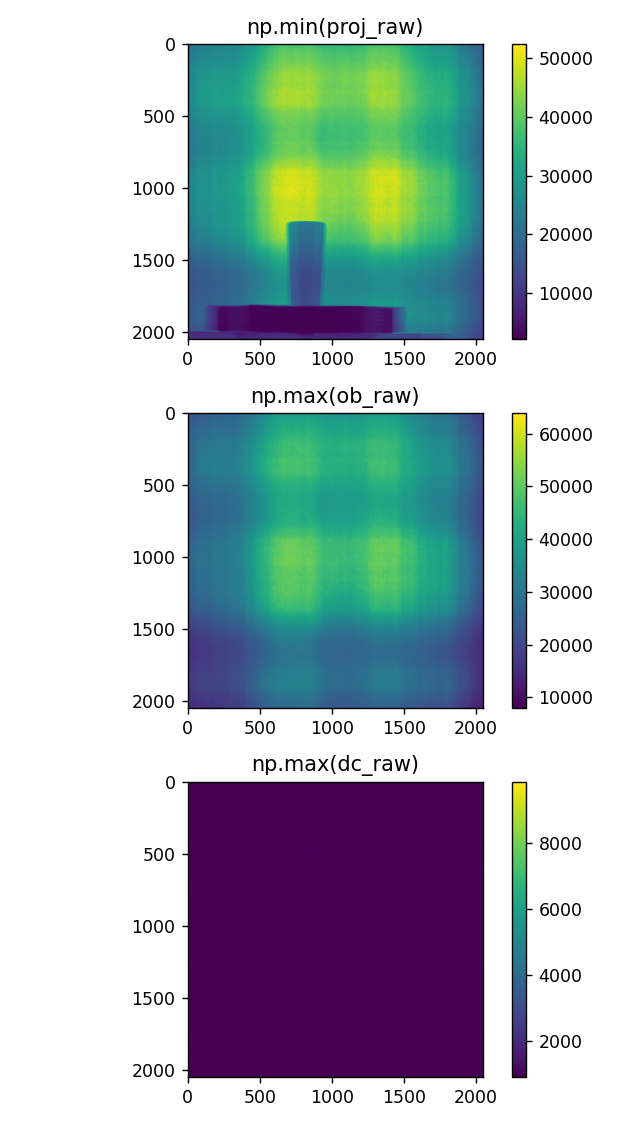

In [5]:
o_imars3dui.load_and_display_data()

# Crop

In [6]:
%matplotlib inline

### select crop region

In [7]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=0, description='left', max=2047), IntSlider(value=2047, continuous_updat…

### perform cropping 

In [8]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering()

Running gamma filtering ...
Gamma filtering done in 29.38s


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 7.99s


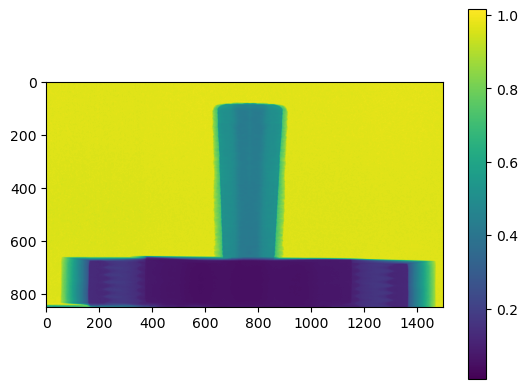

In [10]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [11]:
o_imars3dui.select_beam_fluctuation_roi_embedded()

interactive(children=(IntSlider(value=0, description='left', max=1499), IntSlider(value=1499, continuous_updat…

### perform beam fluctuation correction

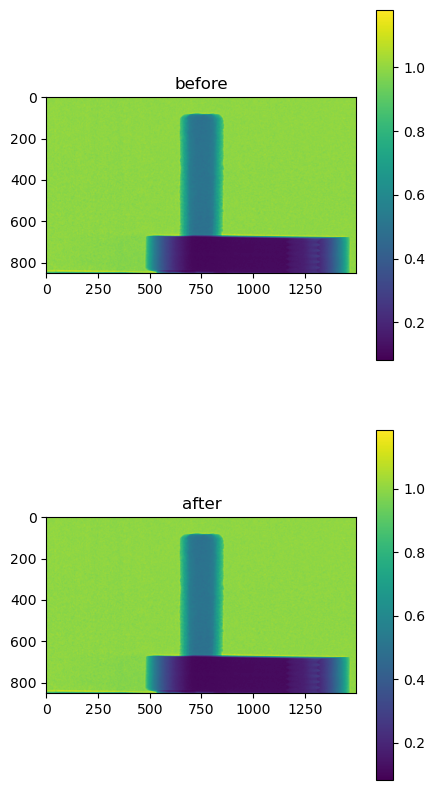

In [12]:
o_imars3dui.beam_fluctuation_correction_embedded()

# Transmission to attenuation

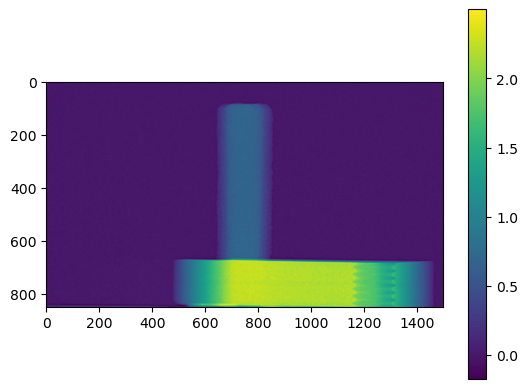

In [13]:
o_imars3dui.minus_log_and_display()

# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

## find 0 and 180 degrees files

In [14]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [15]:
o_imars3dui.calculate_tilt()

## apply tilt correction

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = -0.460 deg


Applying tilt correction using -0.460 ...


Applying tilt corr:   0%|          | 0/1165 [00:00<?, ?it/s]

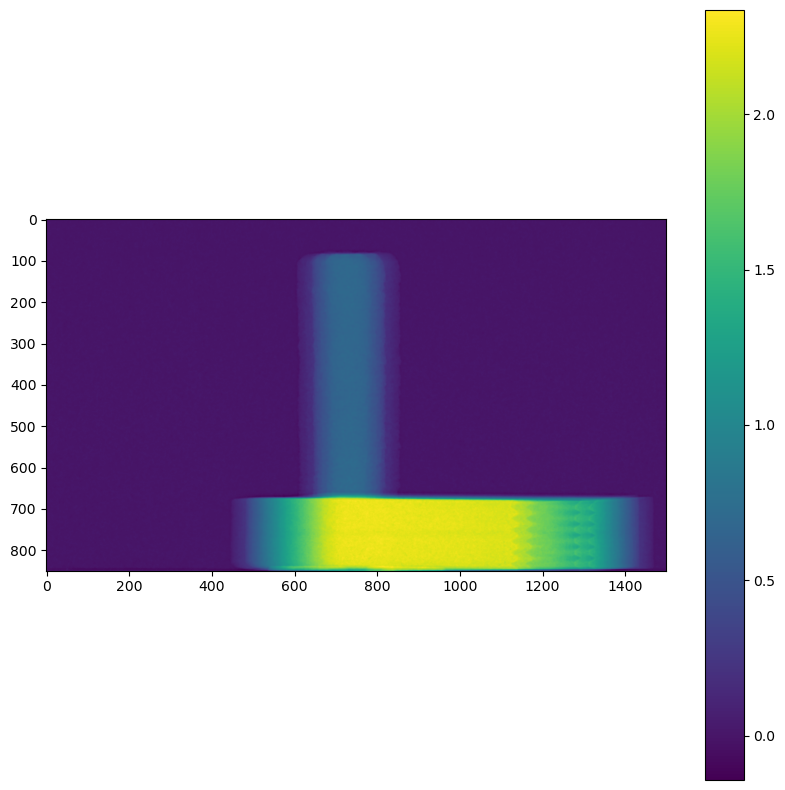

In [16]:
o_imars3dui.apply_tilt_and_display()

# Strikes removal (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

### using imars3d - ketcham method working on 3D stack

In [17]:
o_imars3dui.strikes_removal()

INFO:imars3d.backend.corrections.ring_removal:Executing Filter: Remove Ring Artifact


Running strikes removal ...


Removing ring artifact:   0%|          | 0/850 [00:00<?, ?it/s]

INFO:imars3d.backend.corrections.ring_removal:FINISHED Executing Filter: Remove Ring Artifact


 strikes removal done!
time= 35.28s


# Remove negative values 

In [18]:
o_imars3dui.remove_negative_values()

# Display sinogram 

In [19]:
o_imars3dui.display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

# Rotation center (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [20]:
o_imars3dui.rotation_center()

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 7
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Running rotation center ...


Finding rotation center:   0%|          | 0/1169 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


rotation center found in 63.72s
 - value: (767.5,)


# Testing reconstruction on some slides

In [21]:
import algotom.rec.reconstruction as rec
import multiprocessing as mp
import numpy as np

from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [24]:
o_imars3dui.rot_center


(767.5,)

In [30]:
list_slices = [200, 500, 800]
rec_images = []
for num, idx in enumerate(list_slices):
    rec_images.append(rec.gridrec_reconstruction(o_imars3dui.sinogram_mlog[idx],
                                         o_imars3dui.rot_center[0],
                                         angles=o_imars3dui.rot_angles,
                                         apply_log=False,
                                         ratio=1.0,
                                         filter_name='shepp',
                                         pad=100,
                                         ncore=mp.cpu_count()))
    
# display slices reconstructed here
def display_slices(idx):
    fig, axs = plt.subplots(num="testing reconstruction")
    axs.imshow(rec_images[idx])
    
display_test = interactive(display_slices,
                          idx = widgets.IntSlider(min=0,
                                                 max=len(list_slices)-1,
                                                 continuous_update=True))
display(display_test)


interactive(children=(IntSlider(value=0, description='idx', max=2), Output()), _dom_classes=('widget-interact'…

# Reconstruction 

In [ ]:
o_imars3dui.reconstruction_and_display()

# Export


In [ ]:
o_imars3dui.export()